In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

# scale back and remmove negative values
# apply gradient dexcent attack on benign sample -> scale back + delta + modify sample by adding bytes

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('PDFMalware2022.csv').dropna()
data.columns

Index(['Fine name', 'pdfsize', 'metadata size', 'pages', 'xref Length',
       'title characters', 'isEncrypted', 'embedded files', 'images', 'text',
       'header', 'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer',
       'startxref', 'pageno', 'encrypt', 'ObjStm', 'JS', 'Javascript', 'AA',
       'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch',
       'EmbeddedFile', 'XFA', 'Colors', 'Class'],
      dtype='object')

In [4]:
new_labels = {'Malicious': 1, 'Benign': 0}
data['Class'] = data['Class'].map(new_labels)


new_labels = {'1(1)': '1', '2(1)': '2', '3(1)': '3', '29(2)': '29', '34(2)': '34', '2(2)': '2', '>': '0', '53(1)': '53', '5(1)': '5', '12(2)': '2', '53(2)': '53', '-1': '0', 
              '(most': '0', '_Pro_Rodeo_Pix_': '0', "_Pro_Rodeo_Pix_'": '0', 'pdfid.py': '0', 'pdfHeader)': '0', 'bytes[endHeader]': '0', 'list': '0', 'unclear': '0', 'Yes': '1', 'No': '0'}

for col in data.drop(columns=['Class']).columns:
    data[col] = data[col].replace(new_labels)

data.head()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0.0,1
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,0,...,0,0,1,0,0,0,8,1,0.0,1
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,1,...,0,1,0,0,0,0,0,0,0.0,1
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,0,...,0,1,1,0,0,0,0,0,0.0,1
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,1,...,0,1,0,0,0,0,0,0,0.0,1


In [5]:
print(data['Class'])

data.describe()

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,stream,trailer,encrypt,ObjStm,Colors,Class
count,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000
mean,87.225581,334.130101,3.398583,2728.630650,51.487479,-0.020852,-0.006485,17.341215,1.203532,-0.043500,1.516811,2.087000,0.554225
std,444.239972,1566.007897,11.903610,18108.388189,1354.775001,0.206809,0.257123,35.330169,1.370455,0.256045,7.633485,58.178074,0.497076
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,9.000000,180.000000,1.000000,12.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,265.000000,1.000000,21.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,80.000000,319.000000,2.000000,77.000000,13.000000,0.000000,0.000000,18.000000,2.000000,0.000000,0.000000,0.000000,1.000000
max,23816.000000,77185.000000,595.000000,263987.000000,76993.000000,4.000000,5.000000,812.000000,46.000000,2.000000,600.000000,5682.000000,1.000000


In [6]:
class_data = data.drop(columns=['Fine name', 'header', 'Class'])

x_train, x_test, y_train, y_test = train_test_split(class_data, data['Class'], test_size=0.2, random_state=77)
x_train.shape

(8018, 30)

In [7]:
# Normalize features
normalizer = Normalizer()
x_train = normalizer.fit_transform(x_train)
x_test = normalizer.transform(x_test)

pd.DataFrame(x_train, columns=class_data.columns).head()

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,obj,...,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors
0,0.149371,0.970912,0.009742,0.107158,0.025978,0.0,0.0,0.00000,0.003247,0.103910,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.146013,0.691737,0.003650,0.673486,0.031028,0.0,0.0,0.00000,0.001825,0.111335,...,0.000000,0.0,0.00000,0.003650,0.0,0.0,0.0,0.014601,0.0,0.000000
2,0.104442,0.992199,0.003730,0.044761,0.000000,0.0,0.0,0.00373,0.000000,0.033571,...,0.003730,0.0,0.00373,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.416310,0.504226,0.005172,0.668422,0.038787,0.0,0.0,0.00000,0.001293,0.234012,...,0.002586,0.0,0.00000,0.001293,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.020534,0.332907,0.002489,0.197255,0.047914,0.0,0.0,0.00000,0.000622,0.647768,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.001245


In [8]:
# Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred)
nb_recall = recall_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred)

print(f"""Naive Bayes scores
      accuracy score: {nb_accuracy}
      precision score: {nb_precision}
      recall score: {nb_recall}
      f1 score: {nb_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")


Naive Bayes scores
      accuracy score: 0.656857855361596
      precision score: 0.9762419006479481
      recall score: 0.4003542958370239
      f1 score: 0.4003542958370239

Confusion matrix:
[[865  11]
 [677 452]]


In [9]:
tree = DecisionTreeClassifier(max_depth=100)
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)

dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

print(f"""Decision tree scores
      accuracy score: {dt_accuracy}
      precision score: {dt_precision}
      recall score: {dt_recall}
      f1 score: {dt_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

Decision tree scores
      accuracy score: 0.9860349127182045
      precision score: 0.9893333333333333
      recall score: 0.9858281665190434
      f1 score: 0.9875776397515528

Confusion matrix:
[[ 864   12]
 [  16 1113]]


In [10]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print(f"""Random forest scores
      accuracy score: {rf_accuracy}
      precision score: {rf_precision}
      recall score: {rf_recall}
      f1 score: {rf_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

Random forest scores
      accuracy score: 0.9925187032418953
      precision score: 0.9929203539823008
      recall score: 0.9937998228520815
      f1 score: 0.9933598937583001

Confusion matrix:
[[ 868    8]
 [   7 1122]]


In [11]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

print(f"""KNN scores
      accuracy score: {knn_accuracy}
      precision score: {knn_precision}
      recall score: {knn_recall}
      f1 score: {knn_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

KNN scores
      accuracy score: 0.9561097256857856
      precision score: 0.9701897018970189
      recall score: 0.9512843224092117
      f1 score: 0.9512843224092117

Confusion matrix:
[[ 843   33]
 [  55 1074]]


In [12]:
hidden_layers = (128,)
activation = 'logistic'
solver = 'adam'

mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=activation, solver=solver)
mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)

mlp_accuracy = accuracy_score(y_test, y_pred)
mlp_precision = precision_score(y_test, y_pred)
mlp_recall = recall_score(y_test, y_pred)
mlp_f1 = f1_score(y_test, y_pred)

print(f"""MLP scores
      accuracy score: {mlp_accuracy}
      precision score: {mlp_precision}
      recall score: {mlp_recall}
      f1 score: {mlp_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

MLP scores
      accuracy score: 0.9187032418952619
      precision score: 0.9163793103448276
      recall score: 0.941541186891054
      f1 score: 0.941541186891054

Confusion matrix:
[[ 779   97]
 [  66 1063]]


/home/paul/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
test_data_svm = data.sample(frac=1).reset_index(drop=True)[:4000]
# print(test_data_svm['Class'])
used_data_svm = test_data_svm.drop(columns=['Fine name', 'header', 'Class'])
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(used_data_svm, test_data_svm['Class'], test_size=0.2, random_state=69)

x_train_svm = normalizer.fit_transform(x_train_svm)
x_test_svm = normalizer.transform(x_test_svm)

C_values = [1, 0.8, 0.5, 0.3, 0.1]
for c in C_values:
    svc = SVC(kernel='linear', C=c)
    svc.fit(x_train_svm, y_train_svm)
    y_pred = svc.predict(x_test_svm)
    print(f"C = {c}, F1: {f1_score(y_test_svm, y_pred)}")

C = 1, F1: 0.8784067085953878
C = 0.8, F1: 0.8765690376569037
C = 0.5, F1: 0.865979381443299
C = 0.3, F1: 0.8583078491335372
C = 0.1, F1: 0.8534653465346534


In [14]:
# SVM
# svc = SVC(kernel='linear')
# svc.fit(x_train, y_train)
svc = SVC(kernel='linear', C=1)
svc.fit(x_train_svm, y_train_svm)

y_pred = svc.predict(x_test_svm)

svm_accuracy = accuracy_score(y_test_svm, y_pred)
svm_precision = precision_score(y_test_svm, y_pred)
svm_recall = recall_score(y_test_svm, y_pred)
svm_f1 = f1_score(y_test_svm, y_pred)

print(f"""SVM scores
      accuracy score: {svm_accuracy}
      precision score: {svm_precision}
      recall score: {svm_recall}
      f1 score: {svm_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test_svm, y_pred)}")


SVM scores
      accuracy score: 0.855
      precision score: 0.8313492063492064
      recall score: 0.9311111111111111
      f1 score: 0.8784067085953878

Confusion matrix:
[[265  85]
 [ 31 419]]


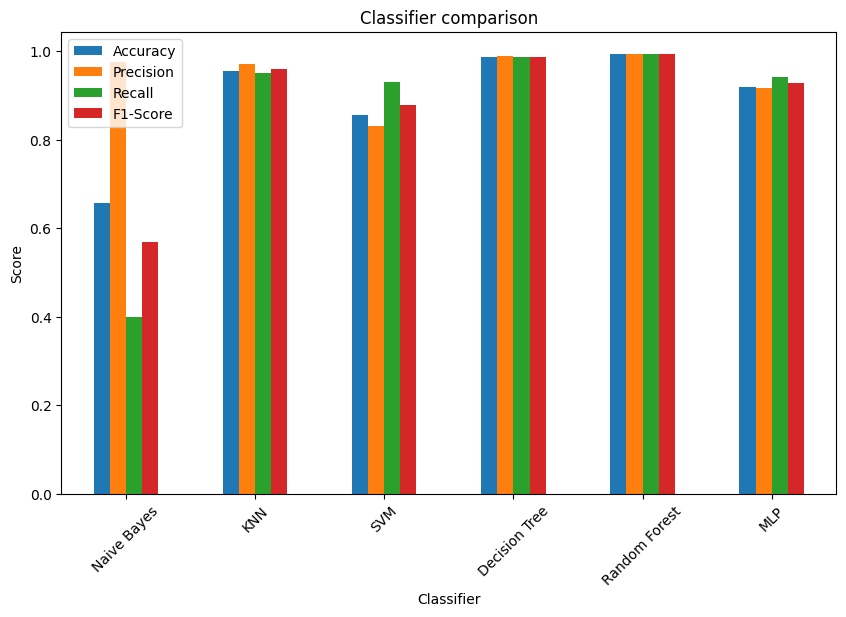

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

results = {
    "Classifier": ["Naive Bayes", "KNN", "SVM", "Decision Tree", "Random Forest", "MLP"],
    "Accuracy": [nb_accuracy, knn_accuracy, svm_accuracy, dt_accuracy, rf_accuracy, mlp_accuracy],
    "Precision": [nb_precision, knn_precision, svm_precision, dt_precision, rf_precision, mlp_precision],
    "Recall": [nb_recall, knn_recall, svm_recall, dt_recall, rf_recall, mlp_recall],
    "F1-Score": [nb_f1, knn_f1, svm_f1, dt_f1, rf_f1, mlp_f1]
}
df_results = pd.DataFrame(results)

##Code to display the results
df_results.plot(kind='bar', x='Classifier', figsize=(10, 6))
plt.title('Classifier comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_972309/2332541769.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')


Text(0.5, 1.0, 'Features importance')

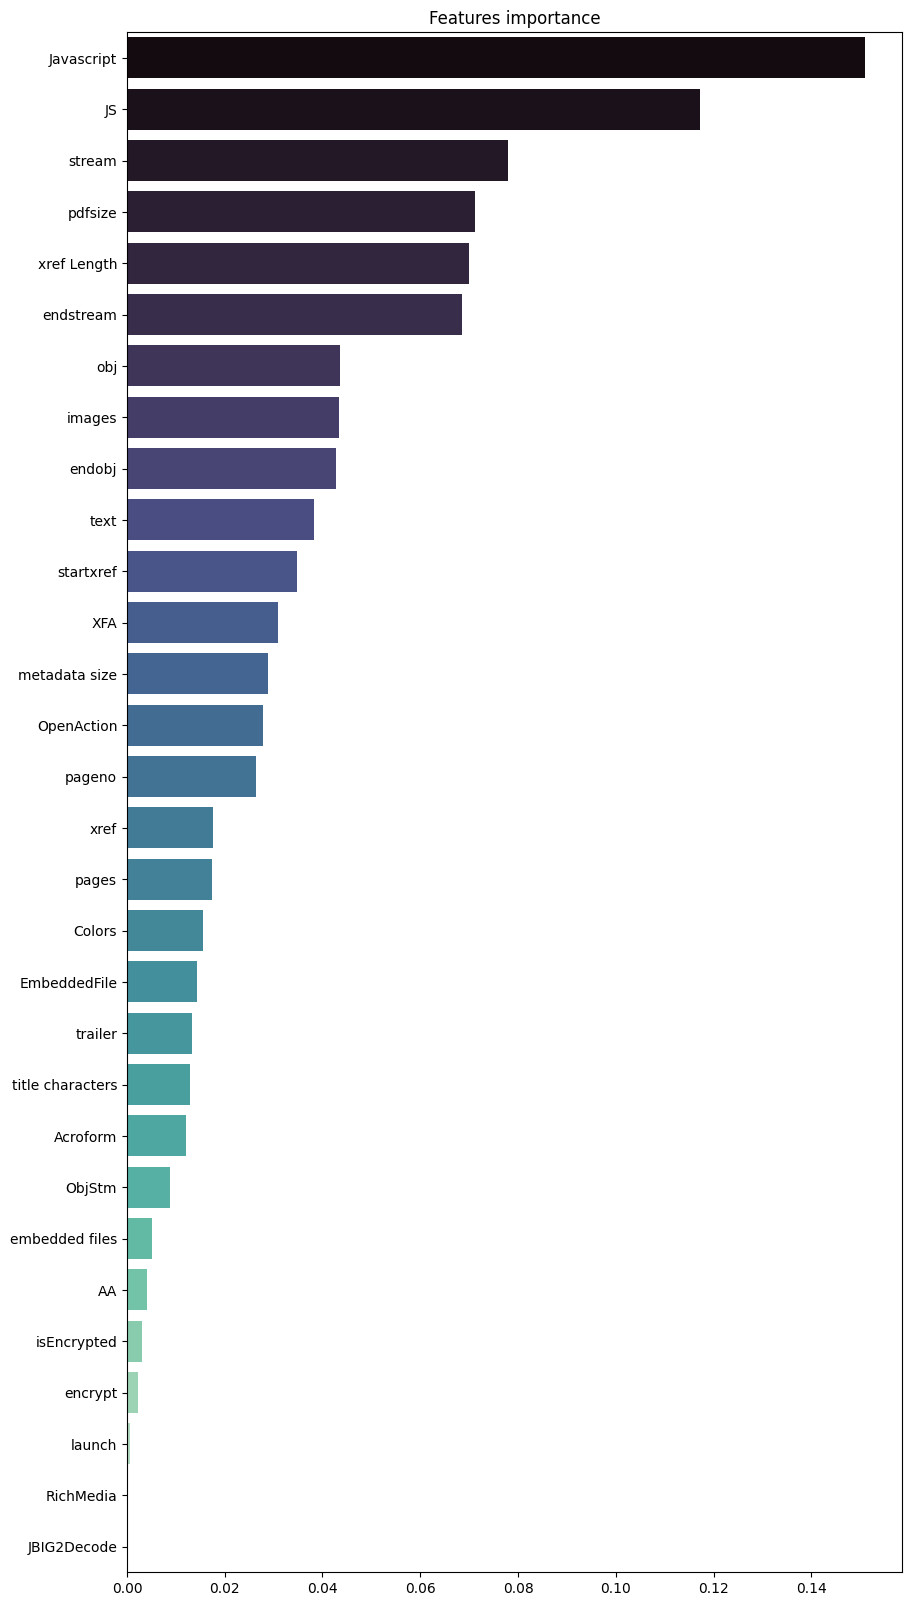

In [16]:
# Feature importance
importance = rf.feature_importances_
importance_dict = {class_data.columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features importance')



In [17]:
def evasion_gradient_descent(x0, gradient, t, epsilon, max_iter):

    m = 0
    x_m = x0
    for i in range(max_iter):

        m += 1
        x_m = x_m - t * gradient
        # print(f"Iteration {i}...")
        if np.linalg.norm(x_m - x0) < epsilon:
            break

    x = x_m
    return x_m


def rbf_kernel(x, x_i, gamma=0.0001):
    return np.exp(- gamma * np.pow(np.linalg.norm(x - x_i), 2))

def poly_kernel(x, x_i, d=3, c=1):
    return np.pow((x @ x_i) + c, d)

def gradient_rbf_kernel(x, x_i, gamma):
    return -2 * gamma * np.exp(- gamma * np.pow(np.linalg.norm(x - x_i), 2)) * (x - x_i)

def gradient_poly_kernel(x, x_i, d, c):
    return d * np.pow(d * (x @ x_i + c), d - 1) * x_i

def evasion_gradient_descent_with_kernel(x0, y, gradient, t, h, l, epsilon, max_iter):

    m = 0
    x_m = x0

    for i in range(max_iter):

        estimator = delta_f = np.zeros(gradient.shape[0])
        for i in range(y.shape[0]):
            estimator += 0

        x_m = x_m - t * gradient 
        print(f"Iteration {i}...")
        if np.linalg.norm(x_m - x0) < epsilon:
            break
        m += 1

    x = x_m
    return x_m


In [18]:
malicious_sample = class_data[data['Class'] == 1].iloc[-3:-2]
print(malicious_sample.iloc[0])
pred = mlp.predict(malicious_sample)
pred

pdfsize               4.0
metadata size       377.0
pages                 2.0
xref Length          13.0
title characters     11.0
isEncrypted           0.0
embedded files        0.0
images                  0
text                    1
obj                     8
endobj                  8
stream                2.0
endstream               2
xref                    1
trailer               1.0
startxref               1
pageno                  1
encrypt               0.0
ObjStm                0.0
JS                      1
Javascript              1
AA                      0
OpenAction              1
Acroform                0
JBIG2Decode             0
RichMedia               0
launch                  0
EmbeddedFile            0
XFA                     0
Colors                0.0
Name: 10023, dtype: object


/home/paul/.local/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


array([0])

In [19]:
# SVM
gamma_values = [1, 1/1000, 1/x_train_svm.shape[0], 1/10**6]
for g in gamma_values:
     svc_rbf = SVC(kernel='rbf', gamma=g)
     svc_rbf.fit(x_train_svm, y_train_svm)
     y_pred = svc_rbf.predict(x_test_svm)
     print(f"Gamma = {g}, F1: {f1_score(y_test_svm, y_pred)}")

svc_rbf = SVC(kernel='rbf', gamma=1)
svc_rbf.fit(x_train_svm, y_train_svm)

y_pred = svc_rbf.predict(x_test_svm)

svm_rbf_accuracy = accuracy_score(y_test_svm, y_pred)
svm_rbf_precision = precision_score(y_test_svm, y_pred)
svm_rbf_recall = recall_score(y_test_svm, y_pred)
svm_rbf_f1 = f1_score(y_test_svm, y_pred)

print(f"""\nSVM with rbf kernel scores
      accuracy score: {svm_rbf_accuracy}
      precision score: {svm_rbf_precision}
      recall score: {svm_rbf_recall}
      f1 score: {svm_rbf_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test_svm, y_pred)}")

Gamma = 1, F1: 0.8972746331236897
Gamma = 0.001, F1: 0.72
Gamma = 0.0003125, F1: 0.72
Gamma = 1e-06, F1: 0.72

SVM with rbf kernel scores
      accuracy score: 0.8775
      precision score: 0.8492063492063492
      recall score: 0.9511111111111111
      f1 score: 0.8972746331236897

Confusion matrix:
[[274  76]
 [ 22 428]]


In [20]:
coef_values = [0, 5, 10]
degrees = [1, 2, 4, 7]

for c in coef_values:
    for d in degrees:
       svc_poly = SVC(kernel='poly', coef0=c, degree=d)
       svc_poly.fit(x_train_svm, y_train_svm)
       y_pred = svc_poly.predict(x_test_svm)
       print(f"Constant = {c}, degree = {d}, F1: {f1_score(y_test_svm, y_pred)}")
print()


svc_poly = SVC(kernel='poly', coef0=5, degree=7)
svc_poly.fit(x_train_svm, y_train_svm)
y_pred = svc_poly.predict(x_test_svm)

svm_poly_accuracy = accuracy_score(y_test_svm, y_pred)
svm_poly_precision = precision_score(y_test_svm, y_pred)
svm_poly_recall = recall_score(y_test_svm, y_pred)
svm_poly_f1 = f1_score(y_test_svm, y_pred)

print(f"""SVM with rbf poly scores
      accuracy score: {svm_poly_accuracy}
      precision score: {svm_poly_precision}
      recall score: {svm_poly_recall}
      f1 score: {svm_poly_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test_svm, y_pred)}")

Constant = 0, degree = 1, F1: 0.8772298006295908
Constant = 0, degree = 2, F1: 0.8980021030494216
Constant = 0, degree = 4, F1: 0.9155370177267987
Constant = 0, degree = 7, F1: 0.926984126984127
Constant = 5, degree = 1, F1: 0.8772298006295908
Constant = 5, degree = 2, F1: 0.9173728813559322
Constant = 5, degree = 4, F1: 0.9633740288568258
Constant = 5, degree = 7, F1: 0.9800884955752213
Constant = 10, degree = 1, F1: 0.8772298006295908
Constant = 10, degree = 2, F1: 0.9211087420042644
Constant = 10, degree = 4, F1: 0.9721293199554069
Constant = 10, degree = 7, F1: 0.9681668496158068

SVM with rbf poly scores
      accuracy score: 0.9775
      precision score: 0.9757709251101322
      recall score: 0.9844444444444445
      f1 score: 0.9800884955752213

Confusion matrix:
[[339  11]
 [  7 443]]


In [21]:
def svm_gradient(weights, feature_vector=None, support_vectors=None, kernel='linear', gamma=0.001, d=3, c=0):
    if kernel == 'linear':
        return weights
    
    delta_g = np.zeros(feature_vector.shape)
    kernel_gradient = np.zeros(feature_vector.shape)
    for i in range(support_vectors.shape[0]):
        w_i = weights[i]
        x_i = support_vectors[i]
        if kernel == 'rbf':
            kernel_gradient = gradient_rbf_kernel(feature_vector, x_i, gamma)
        elif kernel == 'poly':
            kernel_gradient = gradient_poly_kernel(feature_vector, x_i, d, c)
        # print(f"delta_g: {delta_g.shape}, weights: {weights.shape}, kernel_gradient: {kernel_gradient.shape}")
        delta_g = delta_g + w_i * kernel_gradient
    return delta_g

In [22]:
x = malicious_sample.iloc[0].to_numpy().astype(int)
x = normalizer.fit_transform([x])[0]

weights_linear = svc.coef_[0]
bias_linear = svc.intercept_
print(f"x: {x.shape}")

gradient_linear = weights_linear
print(f"Linear weights:\n{gradient_linear}")

gamma = svc_rbf.get_params()['gamma']
weights_rbf = svc_rbf.dual_coef_[0]
# print(f"{x_train_svm.iloc[svc_rbf.support_].head()}")
support_vectors_rbf = svc_rbf.support_vectors_ # x_train_svm.iloc[svc_rbf.support_].to_numpy().astype(int)
print(f"Gamma: {gamma}, Weights: {weights_rbf.shape}, Support Vectors: {support_vectors_rbf.shape}")

rbf_gradient = svm_gradient(
    weights=weights_rbf,
    feature_vector=x,
    support_vectors=support_vectors_rbf,
    kernel='rbf',
    gamma=gamma
    )
print(f"RBF gradient: {rbf_gradient.shape}\n{rbf_gradient}")


d = svc_poly.get_params()['degree']
c = svc_poly.get_params()['coef0']
weights_poly = svc_poly.dual_coef_[0]
support_vectors_poly = svc_poly.support_vectors_ # x_train_svm.iloc[svc_poly.support_].to_numpy().astype(int)
print(f"Degree: {d}, Constant: {c}, Weights: {weights_poly.shape}, Support Vectors: {support_vectors_poly.shape}")

poly_gradient = svm_gradient(
    weights=weights_poly,
    feature_vector=x,
    support_vectors=support_vectors_poly,
    kernel='poly',
    d=d,
    c=c
    )
print(f"Poly gradient: {poly_gradient.shape}\n{poly_gradient}")

x: (30,)
Linear weights:
[-4.16724128e+00 -5.91856005e+00  8.67755896e-01 -6.07139698e+00
 -6.91409894e-01 -4.82743839e-02  8.61438598e-02 -5.81367225e+00
 -4.82830080e-01 -3.95946539e+00 -4.52647314e+00 -3.17672392e+00
 -3.24971176e+00 -5.82865199e-01 -3.34043375e-01 -4.38621236e-01
  1.55383293e+00 -1.28444346e-01 -3.91205836e-01  3.17316480e+00
  4.43114089e+00  4.77379546e-03  1.49500908e+00  3.12657947e-01
 -1.34019516e-01  6.79584784e-02  1.25685869e-01  2.65224041e+00
  4.59514849e-01  1.86076743e+00]
Gamma: 1, Weights: (1389,), Support Vectors: (1389, 30)
RBF gradient: (30,)
[-6.90903736e+00 -2.43183575e+00  1.33225376e+00 -4.18396947e+00
 -8.71676013e-01  6.78390628e-03  2.19888523e-01 -8.29570853e+00
 -8.59020204e-01 -3.58411185e+00 -4.56246980e+00 -4.50234691e+00
 -4.56587772e+00 -1.08605962e+00 -7.00854496e-01 -8.12766289e-01
  1.04223238e+00 -2.80545109e-01 -1.10540085e+00  4.97418588e+00
  6.87597964e+00  2.31318947e-01  2.29451020e+00  6.39074727e-01
 -1.32552896e-01  1.